In [14]:
from sympy import *
import matplotlib.pyplot as plt 
import numpy as np 
import math 

%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML


from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
#if using a Jupyter notebook, include:
%matplotlib inline


In [21]:
def costfunction(X,y,theta):
    m = np.size(y)

    #Cost function in vectorized form
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;


def gradient_descent(X,y,theta,alpha = 0.0005,num_iters=1000):
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(num_iters)
    theta_0_hist, theta_1_hist = [], [] #For plotting afterwards

    for i in range(num_iters):
        #Grad function in vectorized form
        h = X @ theta
        theta = theta - alpha * (1/m)* (X.T @ (h-y))

        #Cost and intermediate values for each iteration
        J_history[i] = costfunction(X,y,theta)
        theta_0_hist.append(theta[0,0])
        theta_1_hist.append(theta[1,0])

    return theta,J_history, theta_0_hist, theta_1_hist

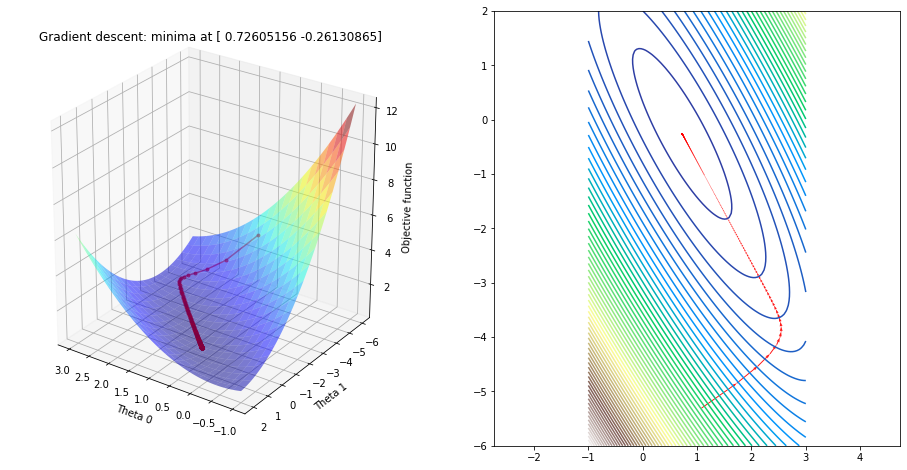

In [73]:
#Creating the dataset (as previously)
x = np.linspace(0,1,35)
noise = 1*np.random.uniform(  size = 35)
y = np.sin(x * 4.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)
X = np.vstack((np.ones(len(x)),x)).T


#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(-1,3,100),np.linspace(-6,2,100))

#Computing the cost function for each theta combination
zs = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)


#Computing the gradient descent
theta_result,J_history, theta_0, theta_1 = gradient_descent(X,y_noise,np.array([0,-6]).reshape(-1,1),alpha = 0.3,num_iters=1000)

#Angles needed for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '.', color = 'r', alpha = .6, label = 'Gradient descent')

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Objective function')
ax.set_title('Gradient descent: minima at {}'.format(theta_result.ravel()))
ax.view_init(25, 125)


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'terrain')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)
plt.axis('equal')
plt.show()